In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Word embeddings in 2020. Review with code examples
Brief overview of current word embedding methods: from Word2vec to Transformers


In this article we will study word embeddings — digital representation of words suitable for processing by machine learning algorithms.
Originally I created this article as a general overview and compilation of current approaches to word embedding in 2020, which our AI Labs team could use from time to time as a quick refresher. I hope that my article will be useful to a wider circle of data scientists and developers. Each word embedding method in the article has a (very) short description, links for further study, and code examples in Python. All code is packed as Google Colab Notebook. So let’s begin.
According to Wikipedia, Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers.

## One-hot or CountVectorizing
The most basic method for transforming words into vectors is to count occurrence of each word in each document. Such approach is called countvectorizing or one-hot encoding.
The main principle of this method is to collect a set of documents (they can be words, sentences, paragraphs or even articles) and count the occurrence of every word in each document. Strictly speaking, the columns of the resulting matrix are words and the rows are documents.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


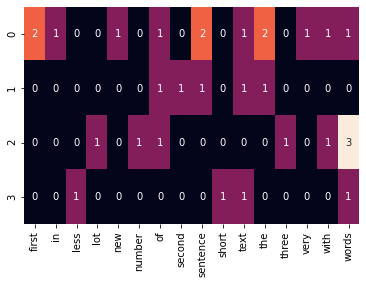

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
# create CountVectorizer object
vectorizer = CountVectorizer()
corpus = [
          'Text of the very first new sentence with the first words in sentence.',
          'Text of the second sentence.',
          'Number three with lot of words words words.',
          'Short text, less words.',
]
# learn the vocabulary and store CountVectorizer sparse matrix in term_frequencies
term_frequencies = vectorizer.fit_transform(corpus) 
vocab = vectorizer.get_feature_names()
# convert sparse matrix to numpy array
term_frequencies = term_frequencies.toarray()
# visualize term frequencies 
import seaborn as sns
sns.heatmap(term_frequencies, annot=True, cbar = False, xticklabels = vocab);

Another approach in countvectorizing is just to place 1 if the word is found in the document (no matter how often) and 0 if the word is not found in the document. In this case we get real ‘one-hot’ encoding.

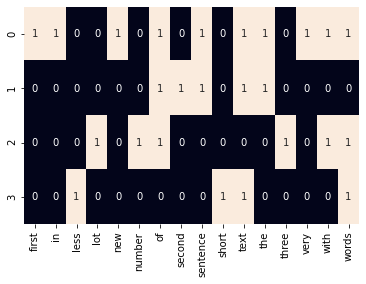

In [2]:
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(one_hot, annot=True, cbar = False, xticklabels = vocab)

## TF-IDF encoding
With a large corpus of documents some words like ‘a’, ‘the’, ‘is’, etc. occur very frequently but they don’t carry a lot of information. Using one-hot encoding approach we can decide that these words are important because they appear in many documents. One of the ways to solve this problem is stopwords filtering, but this solution is discrete and not flexible.
TF-IDF (term frequency — inverse document frequency) can deal with this problem better. TF-IDF lowers the weight of commonly used words and raises the weight of rare words that occur only in current document. TF-IDF formula looks like this:

![texto alternativo](https://miro.medium.com/max/655/1*tMTbOwNzKx06chETJkZ6ww.png)

Where TF is calculated by dividing number of times the word occurs in the document by the total number of words in the document

![texto alternativo](https://miro.medium.com/max/349/1*y2mxpp2Vl6W7_ZmdUISkXA.png)

IDF (inverse document frequency), interpreted like inversed number of documents, in which the term we’re interested in occurs. N — number of documents, n(t) — number of documents with current word or term t.

![texto alternativo](https://miro.medium.com/max/223/1*6PP8jjIoi7Oe3O1Wo4a2vQ.png)

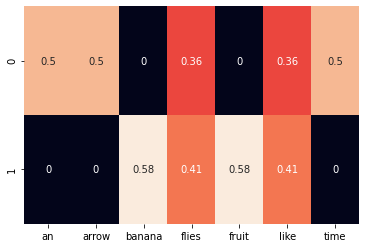

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
corpus = [
          'Time flies like an arrow.',
          'Fruit flies like a banana.'
]
vocab = ['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar = False, xticklabels = vocab)

## Word2Vec and GloVe
The most commonly used models for word embeddings are [word2vec](https://github.com/dav/word2vec/) and [GloVe](https://nlp.stanford.edu/projects/glove/) which are both unsupervised approaches based on the distributional hypothesis (words that occur in the same contexts tend to have similar meanings).
Word2Vec word embeddings are vector representations of words, that are typically learnt by an unsupervised model when fed with large amounts of text as input (e.g. Wikipedia, science, news, articles etc.). These representation of words capture semantic similarity between words among other properties. Word2Vec word embeddings are learnt in a such way, that distance between vectors for words with close meanings (“king” and “queen” for example) are closer than distance for words with complety different meanings (“king” and “carpet” for example).

![texto alternativo](https://miro.medium.com/max/700/1*lzjgo2KaWFRPkV3LCJDr7Q.png)



Word2Vec vectors even allow some mathematic operations on vectors. For example, in this operation we are using word2vec vectors for each word:

`king — man + woman = queen`



In [4]:
# Download Google Word2Vec embeddings https://code.google.com/archive/p/word2vec/
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
!gunzip GoogleNews-vectors-negative300.bin
# Try Word2Vec with Gensim
import gensim
# Load pretrained vectors from Google
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
king = model['king']

--2020-09-01 00:15:06--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.107.118
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.107.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  46.1MB/s    in 36s     

2020-09-01 00:15:42 (43.5 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.518113374710083), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411999702454)]


In [6]:
# king - man + woman = queen
print(model.most_similar(positive=['woman', 'king'], negative=['man']))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.518113374710083), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411999702454)]


Check how similar are vectors for words ‘woman’ and ‘man’.

In [5]:
print(model.similarity('woman', 'man'))

0.76640123


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Check how similar are vectors for words ‘king’ and ‘woman’.

In [7]:
print(model.similarity('king', 'woman'))

0.12847973


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


 ### Try Glove word embeddings with Spacy

 Another word embedding method is **Glove** (“Global Vectors”). It is based on matrix factorization techniques on the word-context matrix. It first constructs a large matrix of (words x context) co-occurrence information, i.e. for each “word” (the rows), you count how frequently we see this word in some “context” (the columns) in a large corpus. Then this matrix is factorized to a lower-dimensional (word x features) matrix, where each row now stores a vector representation for each word. In general, this is done by minimizing a “reconstruction loss”. This loss tries to find the lower-dimensional representations which can explain most of the variance in the high-dimensional data.

In [8]:
!python3 -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=19052319a9ae4366b5032c3feb24c396a34e64813b693a427fa1c52d8f3c9f7a
  Stored in directory: /tmp/pip-ephem-wheel-cache-3jsnhx9p/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [9]:
import spacy
# Load the spacy model that you have installed
import en_core_web_lg
nlp = en_core_web_lg.load()
# process a sentence using the model
doc = nlp("man king stands on the carpet and sees woman queen")

In [11]:
#Find similarity between King and Queen (higher value is better).
doc[1].similarity(doc[9])

0.72526103

In [12]:
#Find similarity between King and carpet.
doc[1].similarity(doc[5])

0.20431946

Check if king — man + woman = queen. We will multiply vectors for ‘man’ and ‘woman’ by two, because subtracting one vector for ‘man’ and adding the vector for ‘woman’ will do little to the original vector for “king”, likely because those “man” and “woman” are related themselves.

In [13]:
v =  doc[1].vector - (doc[0].vector*2) + (doc[8].vector*2)
from scipy.spatial import distance
import numpy as np
# Format the vocabulary for use in the distance function
vectors = [token.vector for token in doc]
vectors = np.array(vectors)
# Find the closest word below 
closest_index = distance.cdist(np.expand_dims(v, axis = 0), vectors, metric = 'cosine').argmin()
output_word = doc[closest_index].text
print(output_word)

queen


## FastText
[FastText](https://github.com/facebookresearch/fastText) is an extension of word2vec. FastText was developed by the team of Tomas Mikolov who created the word2vec framework in 2013.

The main improvement of FastText over the original word2vec vectors is the inclusion of character n-grams, which allows computing word representations for words that did not appear in the training data (“out-of-vocabulary” words).

In [14]:
!pip install Cython --install-option="--no-cython-compile"
!pip install fasttext

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
     |████████████████████████████████| 71kB 3.2MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3015284 sha256=4de7339f086a12018abbfe3f7d4b804840aeb9af6f86afc16a0b9b6967744137
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
# download pre-trained language word vectors from one of 157 languges  https://fasttext.cc/docs/en/crawl-vectors.html
# it will take some time, about 5 minutes
import fasttext
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')

In [ ]:
#Create an embedding for the word ‘king’.
ft.get_word_vector('king')

In [ ]:
# Get most similar words for the word ‘king’.
ft.get_nearest_neighbors('king')

In [ ]:
#Test model ability to create vectors for unknown words.
'king-warrior' in ft.words

In [ ]:
# Get most similar words for unknown word ‘king-warrior’.
ft.get_nearest_neighbors('king-warrior')

## ELMo (Embeddings from Language Models)
Unlike traditional word embeddings such as word2vec and GLoVe, the ELMo vector assigned to a token or a word depends on current context and is actually a function of the entire sentence containing that word. So the same word can have different word vectors under different contexts. Also ELMo representations are purely character based so they are not limited to any predefined vocabulary.

Description from the official site:

ELMo is a deep contextualized word representation that models both (1) complex characteristics of the word use (e.g., syntax and semantics), and (2) how these uses vary across linguistic contexts (i.e., to model polysemy). These word vectors are learned functions of the internal states of a deep bidirectional language model (biLM), which is pre-trained on a large text corpus. They can be easily added to existing models and significantly improve the state of the art across a broad range of challenging NLP problems, including question answering, textual entailment and sentiment analysis.

In [ ]:
# use tensorflow 1.x for ELMo, because trere are still no ELMo for tensorflow 2.0
%tensorflow_version 1.x
import tensorflow_hub as hub
import tensorflow as tf
# Download pretrained ELMo model from Tensorflow Hub https://tfhub.dev/google/elmo/3
elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)
sentences =  \
['king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of \
medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.', 
'it is not certain how these legends originated or whether the figure of arthur was based on a historical person.', 
'the legend possibly originated either in wales or in those parts of northern britain inhabited by brythonic-speaking celts.', 
'for a fuller treatment of the stories about king arthur, see also arthurian legend.']

In order to send sentences to the model we need to split them into the arrays of words and pad arrays to the same length. Also we will create ‘mask’ array that will show whether element is a real word or a padding symbol (in our case — ‘_’). We will use ‘mask’ array for visualization later to show only real words.

In [ ]:
words = []
mask = []
masked_words = []

for sent in sentences:
  splitted = sent.split()
  for i in range(36):
    try:
      words.append(splitted[i])
    except:
      words.append('_')
for word in words:
  if word == "_":
    mask.append(False)
  else:
    mask.append(True)
    masked_words.append(word)

In [ ]:
#Create embeddings with ELMo:
embeddings = elmo(
    sentences,
    signature="default",
    as_dict=True)["elmo"]

In [ ]:
##Convert Tensorflow tensors to numpy array.
%%time
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())
  x = sess.run(embeddings)
embs = x.reshape(-1, 1024)
masked_embs = embs[mask]

In [ ]:
# Visualize embeddings using PCA.
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
y = pca.fit_transform(masked_embs)
from sklearn.manifold import TSNE
y = TSNE(n_components=2).fit_transform(y)
import plotly as py
import plotly.graph_objs as go
data = [
    go.Scatter(
        x=[i[0] for i in y],
        y=[i[1] for i in y],
        mode='markers',
        text=[i for i in masked_words],
    marker=dict(
        size=16,
        color = [len(i) for i in masked_words], #set color equal to a variable
        opacity= 0.8,
        colorscale='Viridis',
        showscale=False
    )
    )
]
layout = go.Layout()
layout = dict(
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )
fig = go.Figure(data=data, layout=layout)
fig.show()

## Transformers
At last it’s time for current state-of-the-art approach — Transformers. Famous GPT-2, BERT, CTRL are all Transformers-based and produce context-sensitive embeddings like ELMo. But unlike ELMo Transformers do not use RNN, they do not require to process words in sentence sequentially one-by-one. All words in the sentence are processed in parallel, this approach speeds up processing and solves vanishing gradient problem.
Transformers use the attention mechanizm to describe the connections and dependencies of each specific word with all other words in the sentence. This mechanism and the main principles of Transformers described in detail in a beautifully illustrated article by Jay Alammar.

![texto alternativo](https://miro.medium.com/max/700/0*lnxCxwWsz_uUnunF.png)

For our example we will use brilliant Transformers library which contains the latest Transformers-based models (such as BERT, XLNet, DialoGPT or GPT-2).
Let’s make some embeddings with BERT. Firstly we will need to install Transformers library.

In [ ]:
!pip install transformers

Now we import pytorch, the pretrained BERT model, and a BERT tokenizer that will do all the needed work of converting sentences into format appropriate for BERT (tokenizing itself and adding special tokens like [SEP] and [CLS]).

In [ ]:
import torch
torch.manual_seed(0)
from transformers import BertTokenizer, BertModel
import logging
import matplotlib.pyplot as plt
% matplotlib inline
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Enter some sentences and tokenize them.

In [ ]:
sentences =  \
['king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of \
medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.', 
'it is not certain how these legends originated or whether the figure of arthur was based on a historical person.', 
'the legend possibly originated either in wales or in those parts of northern britain inhabited by brythonic-speaking celts.', 
'for a fuller treatment of the stories about king arthur, see also arthurian legend.']

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0][:99])

In [ ]:
# Print the sentence splitted into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0])[:15])

In [ ]:
# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0]))[:15])

Note that some tokens may look like this: [‘aa’, ‘##th’, ‘##ur’, ‘pen’, ‘##dra’, ‘##gon’]. This is because of the BERT tokenizer was created with a WordPiece model. This model greedily creates a fixed-size vocabulary of individual characters, subwords, and words that best fits our language data. BERT tokenizer uses vocabulary that contains all English characters plus the ~30,000 most common words and subwords found in the English language corpus the model is trained on. So, if the word is not mentioned in a vocabulary, that words is splitted into subwords and characters. The two hash signs (##) before some subwords shows that subword is part of a larger word and preceded by another subword.

We will use tokenizer.encode_plus function, that will:

- Split the sentence into tokens.
- Add the special [CLS] and [SEP] tokens.
- Map the tokens to their IDs.
- Pad or truncate all sentences to the same length.

In [ ]:
# Tokenize all of the sentences and map tokens to word IDs.
input_ids = []
attention_masks = []
tokenized_texts = []
for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True,
                        truncation=True,
                        max_length = 48,          
                        pad_to_max_length = True,                        
                        return_tensors = 'pt',    
                   )
    # Save tokens from sentence as a separate array. 
    marked_text = "[CLS] " + sent + " [SEP]"
    tokenized_texts.append(tokenizer.tokenize(marked_text))
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
# Convert the list into tensor.
input_ids = torch.cat(input_ids, dim=0)

Segment ID. BERT is trained on and expects sentence pairs using 1s and 0s to distinguish between the two sentences. We will encode each sentence separately so we will just mark each token in each sentence with 1.

In [ ]:
segments_ids = torch.ones_like(input_ids)

Now we can call BERT model and finally get model hidden states from which we will create word embeddings.

In [ ]:
with torch.no_grad():
    outputs = model(input_ids, segments_ids)
    hidden_states = outputs[2]

Let’s examine what we’ve got.

In [ ]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
print ("Number of batches:", len(hidden_states[0]))
print ("Number of tokens:", len(hidden_states[0][0]))
print ("Number of hidden units:", len(hidden_states[0][0][0]))

In [ ]:
# Concatenate the tensors for all layers. 
token_embeddings = torch.stack(hidden_states, dim=0)
# Swap dimensions, so we get tensors in format: [sentence, tokens, hidden layes, features]
token_embeddings = token_embeddings.permute(1,2,0,3)

We will use last four hidden layers to create each word embedding.

In [ ]:
processed_embeddings = token_embeddings[:, :, 9:, :]

Concatenate four layers for each token to create embeddings

In [ ]:
embeddings = torch.reshape(processed_embeddings, (4, 48, -1))

Let’s examine embeddings for the first sentence. Firstly we need to get ids of tokens we need to compare.

In [ ]:
for i, token_str in enumerate(tokenized_texts[0]):
  print (i, token_str)

We can see that word ‘king’ is placed at indexes 1 and 17. We will check distance between embeddings 1 and 17. Also, we will check if embedding for the word ‘arthur’ is closer to ‘king’ then to the word ‘table’.

In [ ]:
from scipy.spatial.distance import cosine
 
kings = cosine(embeddings[0][1], embeddings[0][17])
king_table = cosine(embeddings[0][1], embeddings[0][46])
king_archtur = cosine(embeddings[0][2], embeddings[0][1])
 
print('Distance for two kings:  %.2f' % kings)
print('Distance from king to table:  %.2f' % king_table)
print('Distance from Archtur to king:  %.2f' % king_archtur)

So we see that embeddings for two ‘kings’ are quite similar but not the same, and Archtur is closer to be a king than a table.
Things may be simplier with simplerepresentations module. This module does all the work we did earlier — extracts needed hidden states from BERT and creates embeddings in a few lines of code.

In [ ]:
!pip install simplerepresentations
import torch
from simplerepresentations import RepresentationModel
torch.manual_seed(0)
model_type = 'bert'
model_name = 'bert-base-uncased'
representation_model = RepresentationModel(
  model_type=model_type,
  model_name=model_name,
  batch_size=4,
  max_seq_length=48, 
  combination_method='cat', 
  last_hidden_to_use=4 
 )
text_a = sentences
all_sentences_representations, all_tokens_representations = representation_model(text_a=text_a)

Check distaces between Archtur, king and table.

In [ ]:
from scipy.spatial.distance import cosine
kings = cosine(all_tokens_representations[0][1], all_tokens_representations[0][17])
king_table = cosine(all_tokens_representations[0][1], all_tokens_representations[0][46])
king_archtur = cosine(all_tokens_representations[0][2], all_tokens_representations[0][1])
print('Distance for two kings:  %.2f' % kings)
print('Distance from king to table:  %.2f' % king_table)
print('Distance from Archtur to king:  %.2f' % king_archtur)

Same results, less code.

## Conclusion
I hope that after reading this article you have formed an idea of the current approaches to word embeddings and began to understand how to quickly implement these approaches in Python. The world of NLP is diverse and there are many more models and methods for embeddings. In my article I focused on the most common and those that we ourselves often use in our work. You can find additional information in the References section.

Link original
https://towardsdatascience.com/word-embeddings-in-2020-review-with-code-examples-11eb39a1ee6d

![texto alternativo](https://miro.medium.com/max/1000/1*1Kr-mgVDevo63WPYm37gBA.png)